# DEMO from 0 to QISKit

Jean-Michel Torres 2019-01-16, Polytech DEMO
<br>
<img src="./images/BY-NC-SA.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="200 px" align="left">
<br>

# A. No QISKit : python, complexity

## Jupyter

In [1]:
a = 31

In [11]:
print(a)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


## Python

### Import

In [7]:
from math import sqrt

a = 2
b = sqrt(a)
print(b)
c = sin(a)
print(c)

1.4142135623730951
0.9092974268256817


### Loop, test, and Monte-Carlo

In [8]:
import random
import time

start_time = time.time()

#---> calculation starts here
iterations = 5_000_000                                 # change this for accuracy vs duration 
hit = 0                                                 # counter of random hits with module < 1 
for i in range(iterations):
    if random.random()**2 + random.random()**2 < 1:     # random(a,b) returns a pseudo random float between a and b
        hit += 1
#---> calulation ends here
     
    
end_time = time.time()
duration = end_time - start_time

print(f"Total execution time: {duration:.1f} seconds")
print(f"Pi = {4 * hit / iterations}")

Total execution time: 3.0 seconds
Pi = 3.1409688


### Plotting

<function matplotlib.pyplot.show(*args, **kw)>

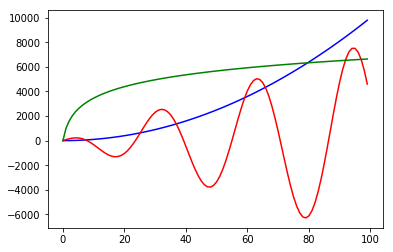

In [10]:
import matplotlib.pyplot as plt
import math

a = [x for x in range(100)]

b = [x**2 for x in range(100)]
c = [80 * x * math.cos(x / 5) for x in range(100)]
d = [1000 * math.log2(x+1) for x in range(100)]

plt.plot(a,b, color="blue")
plt.plot(a,c, color="red")
plt.plot(a,d, color="green")

plt.grid
plt.show


## Computing can become huge

### finding the factors of a large integer

In [12]:
import time
from math import sqrt,floor

start_time = time.time()
# choose one (depending on your ratio patience/CPU)
d =         6721502531819 #(~0.4 sec)  (13)
#d =    40355369611024687 #(~30 sec)   (17)
#d = 70552560783426882343 #(~2100 sec) (20)

maxCalc = floor(sqrt(d))

for i in range(2,maxCalc):
    if d % i == 0:
        print(i)
        break

end_time = time.time()
duration = end_time - start_time
print(f"Total execution time: {duration:.1f} seconds")
print(f"Loops per second {i / duration:.0f}")

1453033
Total execution time: 0.4 seconds
Loops per second 3336738


# B. QISKit, no Quantum, single qbit

#### imports

In [13]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute

#### define needed registers and build quantum circuit

In [14]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)

## <span style="color:red"><em>Example 1 : IDENTITY</em></span>

In [15]:
qc_id = QuantumCircuit(qr,cr)

In [16]:
qc_id.iden(qr[0])

In [17]:
qc_id.measure(qr,cr)

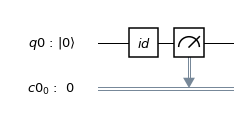

In [18]:
from qiskit.tools.visualization import matplotlib_circuit_drawer

matplotlib_circuit_drawer(qc_id)

### prepare for execution

In [19]:
from qiskit import Aer
print(Aer.backends())
backend = Aer.get_backend('qasm_simulator')

[<QasmSimulatorPy('qasm_simulator_py') from Aer()>, <StatevectorSimulatorPy('statevector_simulator_py') from Aer()>, <UnitarySimulator('unitary_simulator') from Aer()>]


### execute, and read resutls

In [20]:
job = execute(qc_id,backend, shots=1024)
result = job.result()
result.get_counts(qc_id)

{'0': 1024}

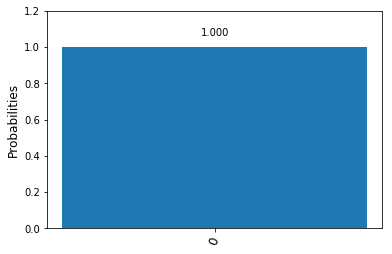

In [21]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(qc_id))

## <span style="color:red"><em>Example 2: NOT (bit flip)</em></span>

In [22]:
qc_not = QuantumCircuit(qr,cr)

In [23]:
qc_not.x(qr[0])

In [24]:
qc_not.measure(qr,cr)

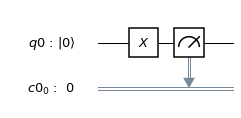

In [25]:
matplotlib_circuit_drawer(qc_not)

In [26]:
job = execute(qc_not,backend, shots=1024)
result = job.result()
result.get_counts(qc_not)

{'1': 1024}

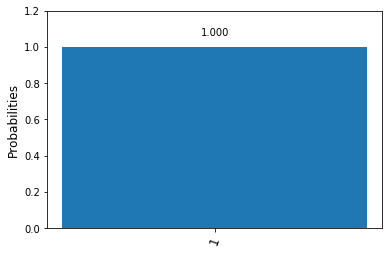

In [27]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(qc_not))

# C. QISKit, no Quantum, multi-qbit gates

## <span style="color:red"><em>Example 3: CNOT controlled not </em></span>

flips state of qbit b if qbit a is 1 (else leave b in original state)

In [28]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

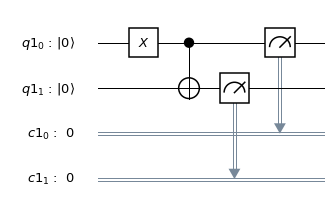

In [29]:
qc_cnot = QuantumCircuit(qr,cr)
qc_cnot.x(qr[0])
qc_cnot.cx(qr[0],qr[1])
qc_cnot.measure(qr,cr)
matplotlib_circuit_drawer(qc_cnot)

In [30]:
job = execute(qc_cnot,backend, shots=1024)
result = job.result()
result.get_counts(qc_cnot)

{'11': 1024}

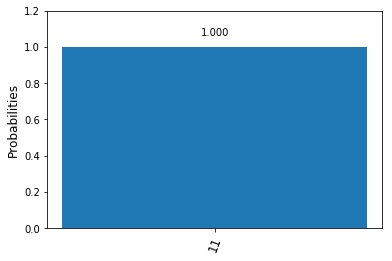

In [31]:
plot_histogram(result.get_counts(qc_cnot))

## <span style="color:red"><em>Example 4: SWAP</em></span>

Swaps states of qbit a with state of qbit b

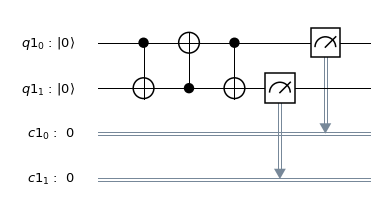

In [32]:
qc_swap = QuantumCircuit(qr,cr)
#qc_swap.x(qr[0])
qc_swap.cx(qr[0],qr[1])
qc_swap.cx(qr[1],qr[0])
qc_swap.cx(qr[0],qr[1])
qc_swap.measure(qr,cr)
matplotlib_circuit_drawer(qc_swap)

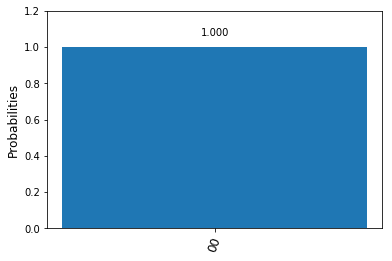

In [33]:
job = execute(qc_swap,backend, shots=1024)
result = job.result()
result.get_counts(qc_swap)
plot_histogram(result.get_counts(qc_swap))

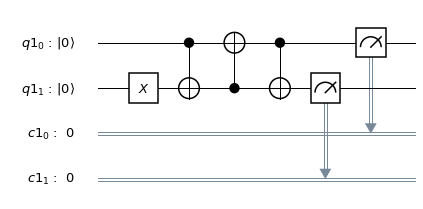

In [34]:
qc_swap = QuantumCircuit(qr,cr)
qc_swap.x(qr[1])
qc_swap.cx(qr[0],qr[1])
qc_swap.cx(qr[1],qr[0])
qc_swap.cx(qr[0],qr[1])
qc_swap.measure(qr,cr)
matplotlib_circuit_drawer(qc_swap)

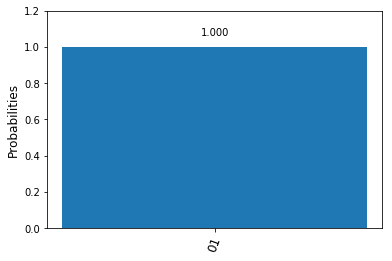

In [35]:
job = execute(qc_swap,backend, shots=1024)
result = job.result()
result.get_counts(qc_swap)
plot_histogram(result.get_counts(qc_swap))

## <span style="color:red"><em>Example 5: CONTROL-CONTROL-NOT Toffoli gate</em></span>

if a = 1 and b = 1, then flip c

Note: <span style="color:green"><em>Toffoli gate is universal</em></span>

In [42]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)

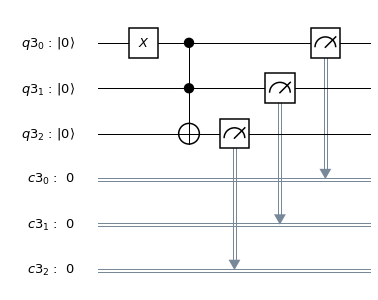

In [43]:
qc_ccnot = QuantumCircuit(qr,cr)
qc_ccnot.x(qr[0])
qc_ccnot.ccx(qr[0],qr[1],qr[2])
qc_ccnot.measure(qr,cr)
matplotlib_circuit_drawer(qc_ccnot)

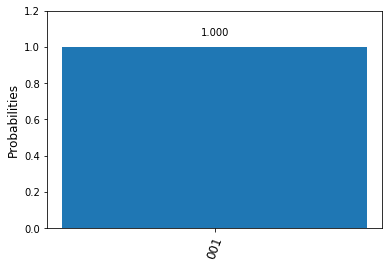

In [44]:
job = execute(qc_ccnot,backend, shots=1024)
result = job.result()
result.get_counts(qc_ccnot)
plot_histogram(result.get_counts(qc_ccnot))

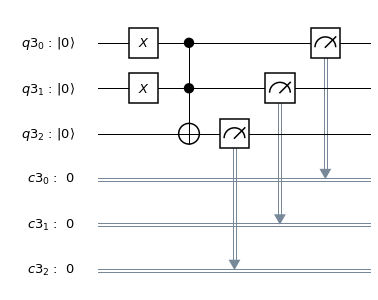

In [45]:
qc_ccnot = QuantumCircuit(qr,cr)
qc_ccnot.x(qr[0])
qc_ccnot.x(qr[1])
qc_ccnot.ccx(qr[0],qr[1],qr[2])
qc_ccnot.measure(qr,cr)
matplotlib_circuit_drawer(qc_ccnot)

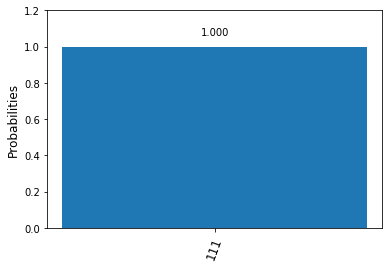

In [46]:
job = execute(qc_ccnot,backend, shots=1024)
result = job.result()
result.get_counts(qc_ccnot)
plot_histogram(result.get_counts(qc_ccnot))

## <span style="color:red"><em>Example 6: CONTROL-SWAP : Fredkin gate</em></span>

if a = 1 then swap b and c states.

Note: Quantum gates are reversible. 

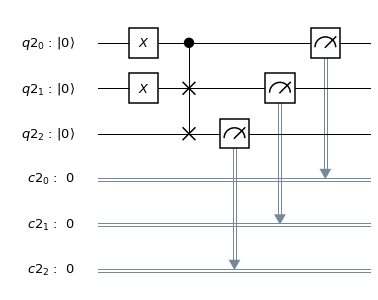

In [41]:
qc_cswap = QuantumCircuit(qr,cr)
qc_cswap.x(qr[0])
qc_cswap.x(qr[1])
qc_cswap.cswap(qr[0],qr[1],qr[2])
qc_cswap.measure(qr,cr)
matplotlib_circuit_drawer(qc_cswap)

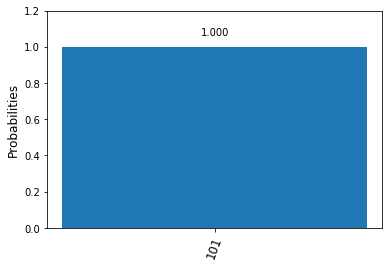

In [47]:
job = execute(qc_cswap,backend, shots=1024)
result = job.result()
result.get_counts(qc_cswap)
plot_histogram(result.get_counts(qc_cswap))

# D. Some Quantum computing

##  <span style="color:red"><em>Single qbit : "superpositon"</em></span>

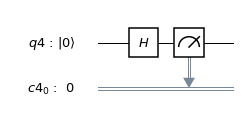

In [48]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc_sup = QuantumCircuit(qr,cr)
qc_sup.h(qr[0])
qc_sup.measure(qr,cr)
matplotlib_circuit_drawer(qc_sup)

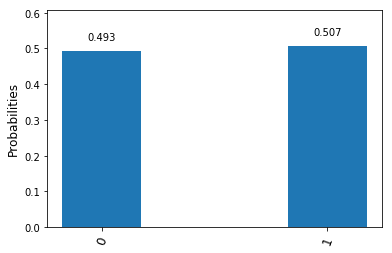

In [52]:
job = execute(qc_sup,backend, shots=8096)
result = job.result()
result.get_counts(qc_sup)
plot_histogram(result.get_counts(qc_sup))

<img src="./images/h_bloch2.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="350 px" align="left">

##  <span style="color:red"><em>What is superposition exactly ?</em></span>

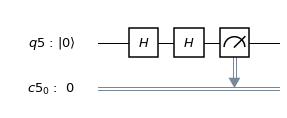

In [53]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc_sup = QuantumCircuit(qr,cr)
qc_sup.h(qr[0])
qc_sup.h(qr[0])
qc_sup.measure(qr,cr)
matplotlib_circuit_drawer(qc_sup)

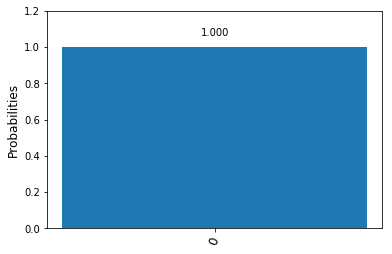

In [54]:
job = execute(qc_sup,backend, shots=1024)
result = job.result()
result.get_counts(qc_sup)
plot_histogram(result.get_counts(qc_sup))


<br>
Let's define states |0⟩, |1⟩ as unitary basis vectors in a two dimensional space, we can write them in this form: 

\begin{equation}
|0⟩ = 
\left(
\begin{array}{cc}
 1 \\
 0 \\
\end{array}
\right)
\hspace{1cm}
|1⟩ = 
\left(
\begin{array}{cc}
 0 \\
 1 \\
\end{array}
\right)
\hspace{1cm}
\end{equation}

Then we define H (Hadamard operator) with this matrix : 


\begin{equation}
H = \frac{1}{\sqrt{2}}
\left(
\begin{array}{cc}
 1 & 1  \\
 1 & -1  \\
\end{array}
\right)
\hspace{1cm}
\end{equation}


It is easy to verify that : 


\begin{equation}
H|0⟩ = \frac{1}{\sqrt{2}} 
\left(
\begin{array}{cc}
 1 \\
 1 \\
\end{array}
\right)
\end{equation}

also, if we multiply this result again by H, we will find : 
\begin{equation}
HH|0⟩ =
\left(
\begin{array}{cc}
 1 \\
 0 \\
\end{array}
\right)
\end{equation}

That is :

\begin{equation} 
HH|0⟩ = |0⟩
\end{equation}

Which makes sense because it is also easy to verify that : 

\begin{equation} 
H^2 = I
\end{equation}

where:

\begin{equation}
I = 
\left(
\begin{array}{cc}
 1 & 0 \\
 0 & 1 \\
\end{array}
\right)
\end{equation}

##  <span style="color:red"><em>Multi qbit : entanglement</em></span>

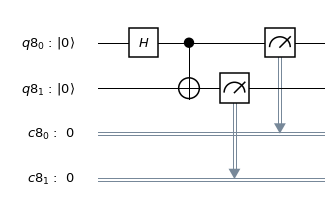

In [58]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc_bell = QuantumCircuit(qr,cr)
qc_bell.h(qr[0])
qc_bell.cx(qr[0],qr[1])
qc_bell.measure(qr,cr)
matplotlib_circuit_drawer(qc_bell)

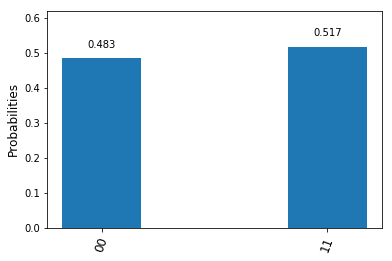

In [56]:
job = execute(qc_bell,backend, shots=1024)
result = job.result()
result.get_counts(qc_bell)
plot_histogram(result.get_counts(qc_bell))

### What does this mean ? ... 

This is called a Bell state and can be written as : 

\begin{equation} 
|Bell⟩ = \frac{1}{\sqrt{2}}\left(|00⟩ + |11⟩ \right) 
\end{equation}

Let's assume we can factor it (find two states the product of which is the Bell state), for example: 

\begin{equation} 
|\phi⟩ = a|0⟩ + (b+ic)|1⟩  
\end{equation}
and 
\begin{equation} 
|\psi⟩ = d|0⟩ + (e+if)|1⟩  
\end{equation}

Then: 
\begin{equation} 
|\phi⟩|\psi⟩ = (ad|00⟩ + (ae + iaf)|01⟩ + (db+idc)|10⟩ + (b+ic)(e+if)|11⟩)  
\end{equation}

As |00⟩, |01⟩, |10⟩, |11⟩ are basis vectors, we can identify:  

\begin{equation}
ad = \frac{1}{\sqrt{2}}
\end{equation}
\begin{equation}
ae + iaf = 0
\end{equation}
\begin{equation}
db + idc = 0
\end{equation}
\begin{equation}
be - cf + i(bf+ce) = \frac{1}{\sqrt{2}}
\end{equation}

then a and d are both not null, so e = f = b = c = 0, with that: be - cf = 0, but this does not work with : 
\begin{equation}
be - cf = \frac{1}{\sqrt{2}}
\end{equation}

Proving that the Bell state cannot be written as a product state. 


### ... it means we cannot know anything about the separate components of the entangled system, we can only know about the whole.

##  <span style="color:red"><em>Bell state : run on actual quantum hardware</em></span>


In [59]:
# sign on to IBM Q Experience, get your API Token, write it in a file (eg Qconfig.py), in a line:  
# APItoken = '<your_API_token'>

import Qconfig

#  now I can use Qconfig.APItoken to get the API key value 

In [60]:
from qiskit import IBMQ
IBMQ.enable_account(Qconfig.APItoken)

In [63]:
#my_back_end = IBMQ.get_backend('ibmq_5_tenerife')
my_back_end = IBMQ.get_backend('ibmq_16_melbourne')

In [64]:
print(my_back_end.status())

{'pending_jobs': 17, 'name': 'ibmq_16_melbourne', 'operational': True}


In [65]:
job = execute(qc_bell,my_back_end, shots=1024)
result = job.result()
result.get_counts(qc_bell)
plot_histogram(result.get_counts(qc_bell))

KeyboardInterrupt: 

##  <span style="color:red"><em>Bernstein-Vazirani : "oracle"</em></span>
### towards computing

In [66]:
q = QuantumRegister(8)
tmp = QuantumRegister(1)
res = ClassicalRegister(8)

In [67]:
# secret = 1101
s = 13
oracle = QuantumCircuit(q,tmp,res)

In [68]:
for i in range(len(q)):
    if ( s & (1 << i) ):
        oracle.cx(q[i],tmp[0])

In [69]:
bv = QuantumCircuit(q,tmp,res)
bv.x(tmp[0])
bv.h(q)
bv.h(tmp)
bv += oracle
bv.h(q)
bv.h(tmp)
bv.measure(q,res)

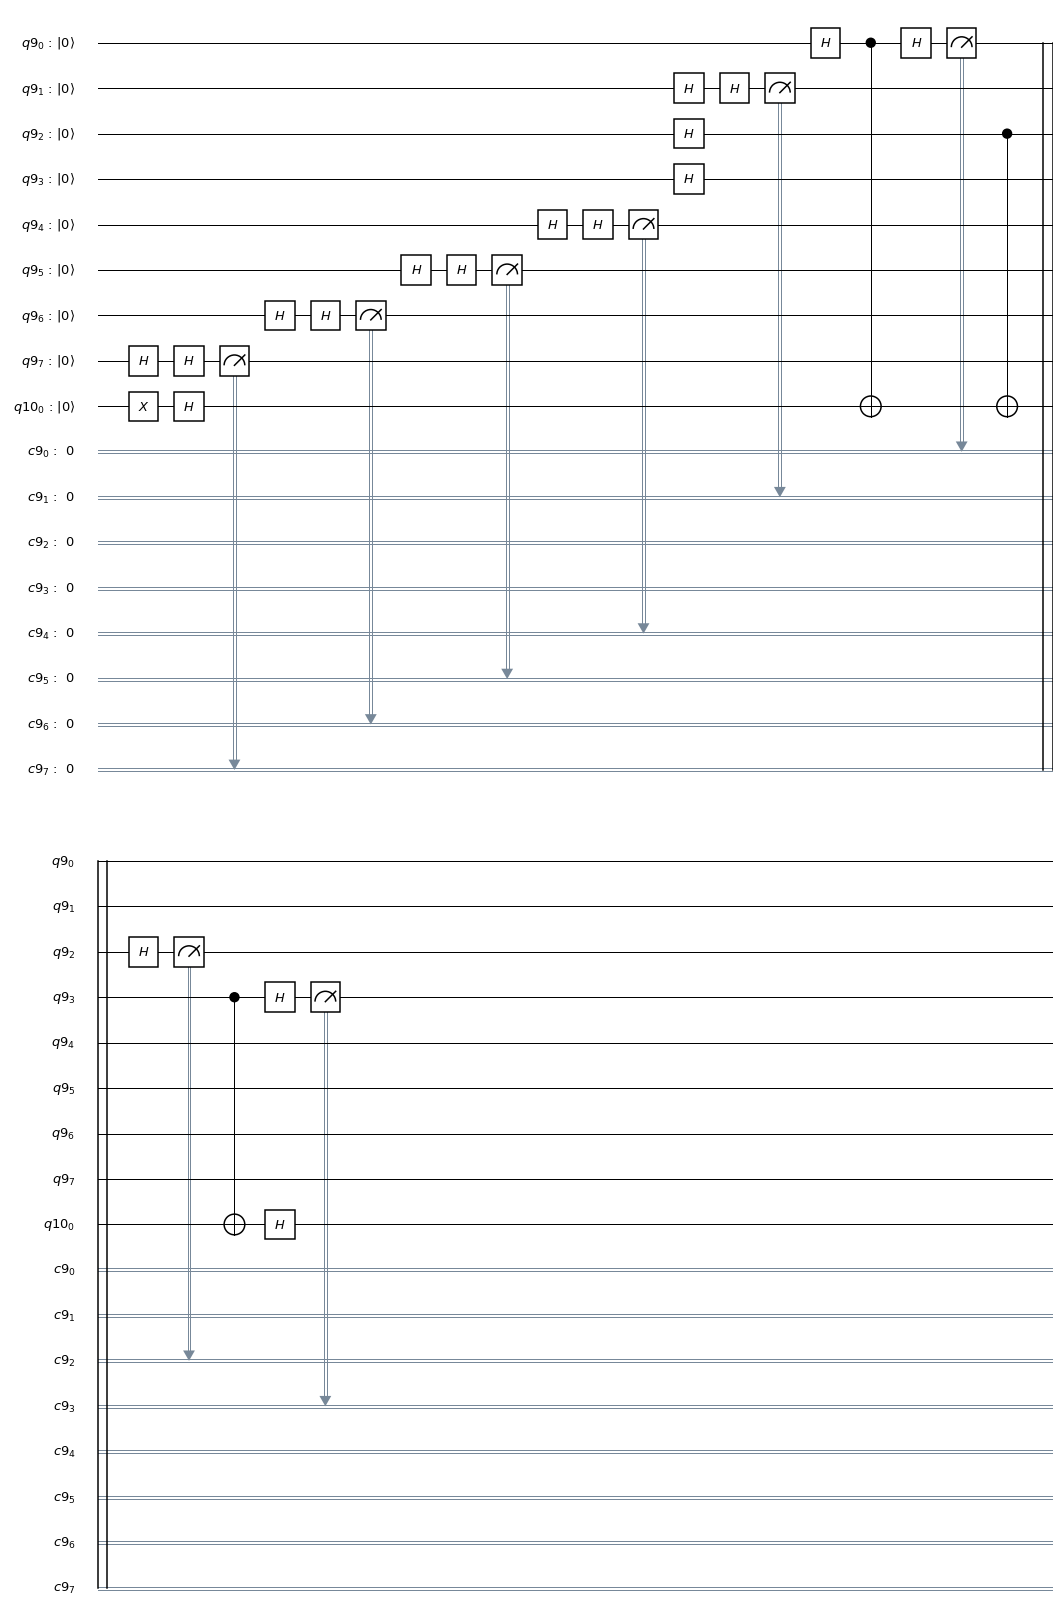

In [70]:
matplotlib_circuit_drawer(bv)

In [71]:
my_job = execute([bv], backend, shots=100)

{'00001101': 100}


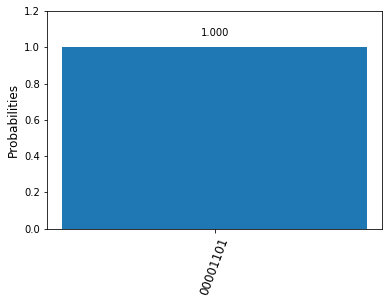

In [72]:
result = my_job.result()
result.get_counts(bv)
print(result.get_counts(bv))
from qiskit.tools.visualization import plot_histogram
plot_histogram (result.get_counts(bv))

# E. Further readings

## <a href="https://www.research.ibm.com/ibm-q/">IBM Q informations, resources</a>

<img src="./images/IBMQ.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="800 px" align="left">


### <a href="https://qiskit.org/">QISKit : documentations, tutorials, GitHub</a>

<img src="./images/qiskitOrg.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="800 px" align="left">



## <a href="https://www.youtube.com/channel/UClBNq7mCMf5xm8baE_VMl3A">QISKit channel on Youtube</a>
<img src="./images/qiskitYoutube.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="800 px" align="left">


### <a href="https://fr.wikipedia.org/wiki/Calculateur_quantique">Wikipedia: Calculateur Quantique</a>
<img src="./images/QCWikipedia.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="800 px" align="left">

## Isaac Chuang, Peter Shor, Quantum Information Science I, Part 1
### Edx MOOC
<br>
<img src="./images/MOOCedX.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="800 px" align="center">
<br>

## Leonard Susskind, Art Freidman: Mécanique Quantique, Le minimum Théorique
### Presses polytechniques et universitaires romandes
<br>
<img src="./images/susskindFriedman.jpg" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">
<br>

## David McMahon, Quantum Computing Explained 
### Wiley
<br>
<img src="./images/mcmahon.jpg" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">
<br>

### David Mermin, Calculs et Algorithmes Quantiques, 
#### EDP Sciences, CNRS Editions
<br>
<img src="./images/mermin.jpg" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">
<br>

## Charles Corge, L'informatique Quantique, qu'est-ce et pour quoi faire ? 
### Ellipses
<br>
<img src="./images/corge.jpeg" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">
<br>

## Michael A. Nielsen and Isaac L. Chuang : Quantum Computation and Quantum Information
### Cambridge
<br>
<img src="./images/nielsenChuang.jpg" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">
<br>